# Introducción


Para el mundo del  Retail(Tiendas por departamento) es todo un reto mantener la lealtad de sus consumidores ya que en la actualidad existe mucha competencia en el rubro, por ello es muy importante el análisis sobre comportamiento del consumidor y hábitos de compra por que esto proporciona información completa sobre las preferencias, tendencias y patrones de los consumidores durante sus experiencias de compra, lo que permitirá tomar decisiones acerca de los  consumidores, ayudando a las empresas a diseñar estrategias de marketing específicas, optimizar las ofertas de productos y mejorar la satisfacción general del cliente.



## Data set


Es por eso que el Data set a analizar posee datos de compras de clientes en diferentes sucursales alrededor de varias ciudades de una misma tienda de retail, a continuación, se presenta a continuación un diccionario de datos que describirá a cabalidad cada columna del Data Set a trabaja.

## Diccionario de datos

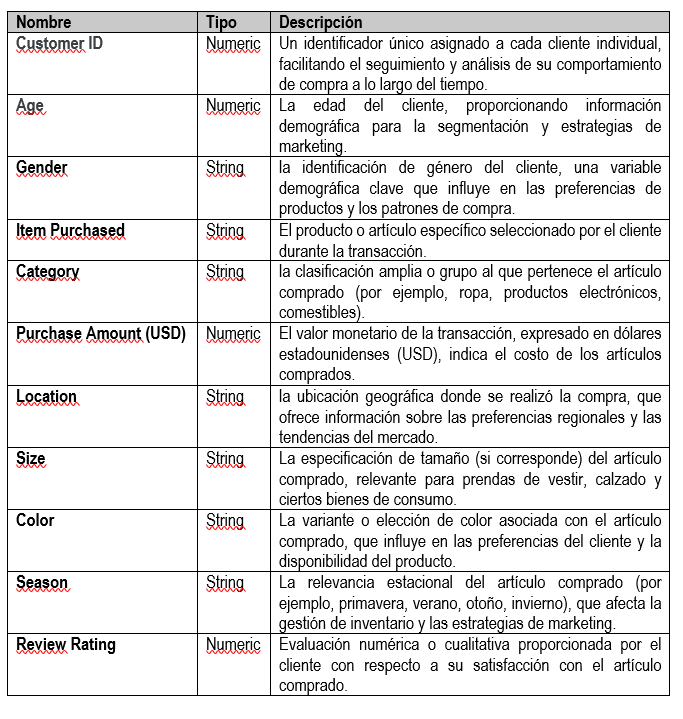


## Hipótesis

 Teniendo una visión general de las descripciones de las columnas a trabajar podemos plantear las siguientes hipótesis:
-	¿Cuál es la sucursal con mayores ventas y cual sucursal la más baja?
-	¿Cuál es la distribución de ventas entre las mujeres y los hombres?
-	¿Cuál es el método de pago preferido por los clientes?
-	¿Hay temporadas concretas en las que determinadas categorías de productos obtienen mejores resultados?
-	¿Los atributos o promociones de artículos específicos influyen significativamente en los montos de compra?
-	¿Existen categorías de productos específicos que sean preferidos por ciertos grupos de edad o géneros?







# Análisis de los Datos

## Importaciones


### Importación de las librerias

In [5]:
import pandas as pd # Importación pandas para la estrcuturación de datos
import numpy as np # Importación NumPy para funcones matematica
import matplotlib.pyplot as plt # Importación Matplotlib para la visualización
import seaborn as sns # Importación de Seaborn para visualización avanzada


### Importación del DataSet

In [6]:
df = pd.read_csv("/content/shopping_behavior_trends.csv",sep=';')

## Previcualización / Limpieza de Data

In [7]:
df.shape #Muestra las dimensiones del dataSet

(3900, 18)

In [8]:
df.head() #Muestra las primeras 5 columnas del dataSet

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
df.tail() #Muestra las últimas 5 filas del dataSet

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [10]:
df.drop(columns = {"Customer ID"}, inplace = True) #Elimino las columnas innecesarias , en este caso la columna Customer ID

In [11]:
df.head() #Chequeo el cambio

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [12]:
df.info()  #Muestra informacion mas detallada de las columnas del dataSet, podemos saber si alguna columna presenta nulos y tipo da dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

*   Podemos observar que ninguna columna posee datos nulos

---









In [13]:
df.describe() #Muestra el analisis estadistico de las columnas

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [14]:
print(df.apply(lambda col: col.unique())) #muestra los valores unicos por cada columna

Age                       [55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 3...
Gender                                                       [Male, Female]
Item Purchased            [Blouse, Sweater, Jeans, Sandals, Sneakers, Sh...
Category                       [Clothing, Footwear, Outerwear, Accessories]
Purchase Amount (USD)     [53, 64, 73, 90, 49, 20, 85, 34, 97, 31, 68, 7...
Location                  [Kentucky, Maine, Massachusetts, Rhode Island,...
Size                                                          [L, S, M, XL]
Color                     [Gray, Maroon, Turquoise, White, Charcoal, Sil...
Season                                       [Winter, Spring, Summer, Fall]
Review Rating             [3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, ...
Subscription Status                                               [Yes, No]
Shipping Type             [Express, Free Shipping, Next Day Air, Standar...
Discount Applied                                                  [Yes, No]
Promo Code U

In [15]:
df.nunique() # Muestra el numero de valores unicos por columna

Age                       53
Gender                     2
Item Purchased            25
Category                   4
Purchase Amount (USD)     81
Location                  50
Size                       4
Color                     25
Season                     4
Review Rating             26
Subscription Status        2
Shipping Type              6
Discount Applied           2
Promo Code Used            2
Previous Purchases        50
Payment Method             6
Frequency of Purchases     7
dtype: int64

In [16]:
df.isnull().sum() # se confirma que no existan datos nulos en las columnas

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [17]:
df.drop_duplicates() #Verificamos que no tengamos datos duplicados

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly



*   No hay valores duplicados




## Explorando los datos


In [18]:
df.columns #Muestra los nombres de las columnas

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [19]:
#cantidad de compras por sucursal
location_counts = df["Location"].value_counts()
print("N° de ventas por sucursales:\n", location_counts)

N° de ventas por sucursales:
 Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey      

In [20]:
#Analisis sobre las tendencias por sucursales
location_groups = df.groupby("Location")
location_groups.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,60,Male,Shorts,Clothing,82,Washington,S,Turquoise,Spring,3.6,Yes,Standard,Yes,Yes,7,Bank Transfer,Every 3 Months
450,25,Male,Boots,Footwear,21,Connecticut,L,Beige,Summer,2.7,Yes,Store Pickup,Yes,Yes,19,Credit Card,Monthly
492,50,Male,Shirt,Clothing,62,Michigan,M,Black,Fall,3.9,Yes,Standard,Yes,Yes,11,Debit Card,Weekly
495,33,Male,Handbag,Accessories,36,Michigan,XL,Cyan,Fall,3.3,Yes,Free Shipping,Yes,Yes,6,Debit Card,Fortnightly


In [21]:
location_purchase_stats = location_groups["Purchase Amount (USD)"].agg(["mean", "median", "sum"]) #Media, mediana y suma del monto de compra para cada sucursal
print("Regional Purchase Amount Stats:\n", location_purchase_stats)

Regional Purchase Amount Stats:
                      mean  median   sum
Location                               
Alabama         59.112360    56.0  5261
Alaska          67.597222    68.5  4867
Arizona         66.553846    68.0  4326
Arkansas        61.113924    58.0  4828
California      59.000000    57.0  5605
Colorado        56.293333    51.0  4222
Connecticut     54.179487    48.5  4226
Delaware        55.325581    52.5  4758
Florida         55.852941    56.0  3798
Georgia         58.797468    62.0  4645
Hawaii          57.723077    55.0  3752
Idaho           60.075269    62.0  5587
Illinois        61.054348    65.0  5617
Indiana         58.924051    60.0  4655
Iowa            60.884058    60.0  4201
Kansas          54.555556    50.0  3437
Kentucky        55.721519    53.0  4402
Louisiana       57.714286    55.5  4848
Maine           56.987013    57.0  4388
Maryland        55.755814    52.0  4795
Massachusetts   60.888889    64.0  4384
Michigan        62.095890    63.0  4533
Minneso

*   Como se observa la sucursal de Alaska es la que posee mayor promedio de compras en US y Connecticut es la sucursal con el menor promedio compras en US

In [22]:
# Analisis de las categorias mas populares por sucursal
category_counts = location_groups["Category"].value_counts()
category_counts

Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: count, Length: 200, dtype: int64

In [23]:
#Medio de pago preferido por sucursal
payment_method = location_groups['Payment Method'].value_counts()
print(payment_method)

Location  Payment Method
Alabama   Debit Card        20
          PayPal            19
          Credit Card       17
          Venmo             15
          Bank Transfer     10
                            ..
Wyoming   Credit Card       17
          Venmo             11
          Cash              10
          Bank Transfer      7
          PayPal             6
Name: count, Length: 300, dtype: int64


In [24]:
#Tendencias por sucursal
for location, location_data in location_groups:
    print(f"Regional Trends for {location}:")

    # Calculate el promedio de compra
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    print(f"Monto Promedio de Compra: ${avg_purchase_amount:.2f}")

    # Muestra la categoria mas popular del porducto mas vendido
    popular_categories = location_data["Category"].value_counts().idxmax()
    print(f"Categoria Más Popular: {popular_categories}")

    # Muestra el medio de pago mas popular
    payment_method = location_data["Payment Method"].value_counts().idxmax()
    print(f"Metodo de Pago Más Popular: {payment_method}")

    print("\n")


Regional Trends for Alabama:
Monto Promedio de Compra: $59.11
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Debit Card


Regional Trends for Alaska:
Monto Promedio de Compra: $67.60
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Credit Card


Regional Trends for Arizona:
Monto Promedio de Compra: $66.55
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Debit Card


Regional Trends for Arkansas:
Monto Promedio de Compra: $61.11
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Cash


Regional Trends for California:
Monto Promedio de Compra: $59.00
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: PayPal


Regional Trends for Colorado:
Monto Promedio de Compra: $56.29
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Bank Transfer


Regional Trends for Connecticut:
Monto Promedio de Compra: $54.18
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: PayPal


Regional Trends for Delaware:
Monto Promedio de Compra: $

##Visualizaciones

<Axes: title={'center': 'N° de Compras por Categoria'}, xlabel='Category', ylabel='N° Comprados'>

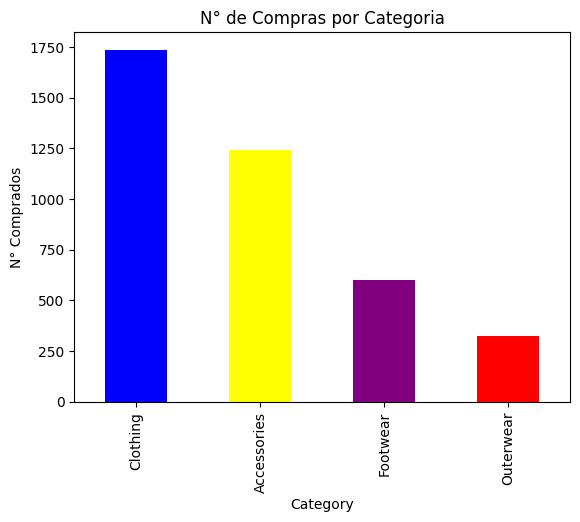

In [25]:
#Grafico de barra para graficar el numero de compras por categorias
category_count = df["Category"].value_counts()
category_count.head()
category_count.plot(kind = "bar", color = ['blue','yellow','purple','red'], title = "N° de Compras por Categoria", ylabel = "N° Comprados")

*  Clothing tiene el mejor historial de compras y la Outerwear tiene el más bajo.

<Axes: title={'center': 'N° de clientes por Sucursal'}, xlabel='Location', ylabel='N° de clientes'>

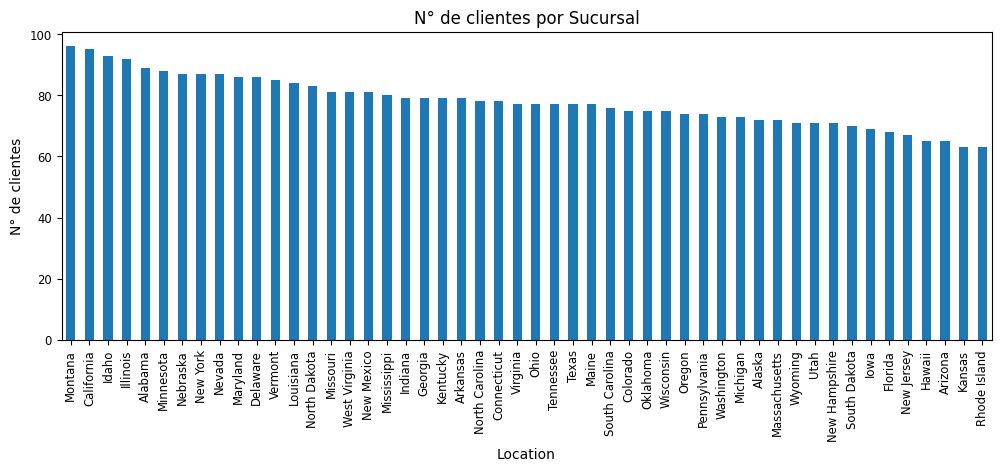

In [26]:
# Numero de clientes por sucursal
location_counts.plot(kind = "bar", rot = 90, figsize = (12,4),fontsize = "small", title = "N° de clientes por Sucursal", ylabel = "N° de clientes")

*  Montana tiene la mayor cantidad de clientes.
*  Rhode Island, podria ser foco importante para campañas de marketing que permitan a un nuevos compradores.

<Axes: title={'center': 'Impact of Season on Purchase Amount'}, xlabel='Temporada', ylabel='Monto Promedio de Compra'>

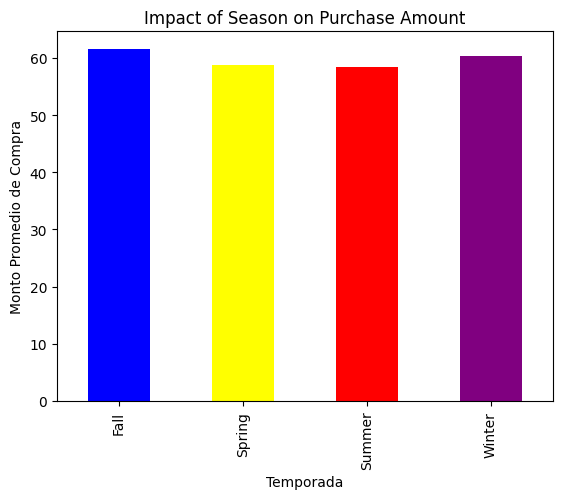

In [27]:
#Visualizacion por sesion
seasons = df['Season'].unique()
average_purchase_season = df.groupby('Season')['Purchase Amount (USD)'].mean()
average_purchase_season.plot(kind = "bar", title = "Impact of Season on Purchase Amount", ylabel = "Monto Promedio de Compra", xlabel = "Temporada", color = ['blue','yellow','red','purple'])

* Fall and Winter tienen el monto de compra promedio más alto de todas las estaciones.
* Spring and Summer no estan muy por detrás de las dos temporadas más altas.

<Axes: title={'center': 'Método de Pago'}, xlabel='Método de Pago', ylabel='Numero de clientes'>

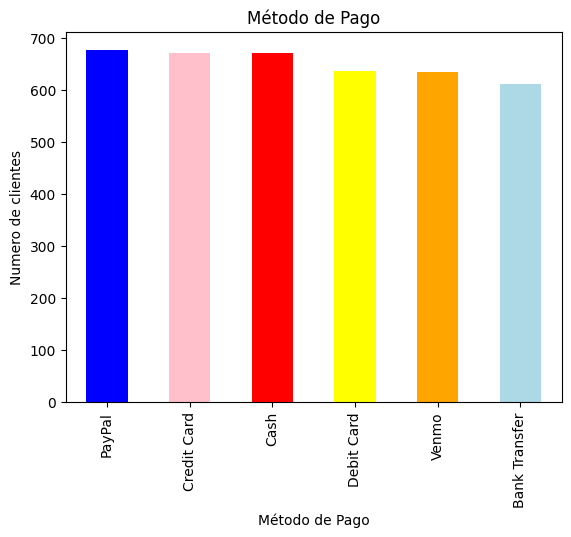

In [28]:
# Visualizacion por metodo de pago

payment_method = df["Payment Method"].value_counts()
payment_method.plot(kind = "bar", color = ['blue','pink','red','yellow','orange','lightblue'], title = "Método de Pago", ylabel = "Numero de clientes", xlabel = "Método de Pago")

<Axes: ylabel='count'>

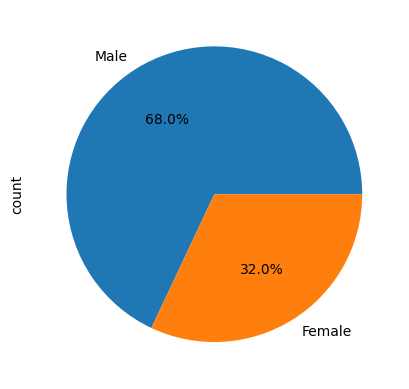

In [29]:
#Distribución por genero
gender_purchase = df['Gender'].value_counts()
gender_purchase.plot(kind = "pie", autopct = '%.1f%%')

*  Los hombres contribuyen a más de la mitad de las compras totales, representando el 68%, mientras que las mujeres representan sólo el 32% de las compras totales.



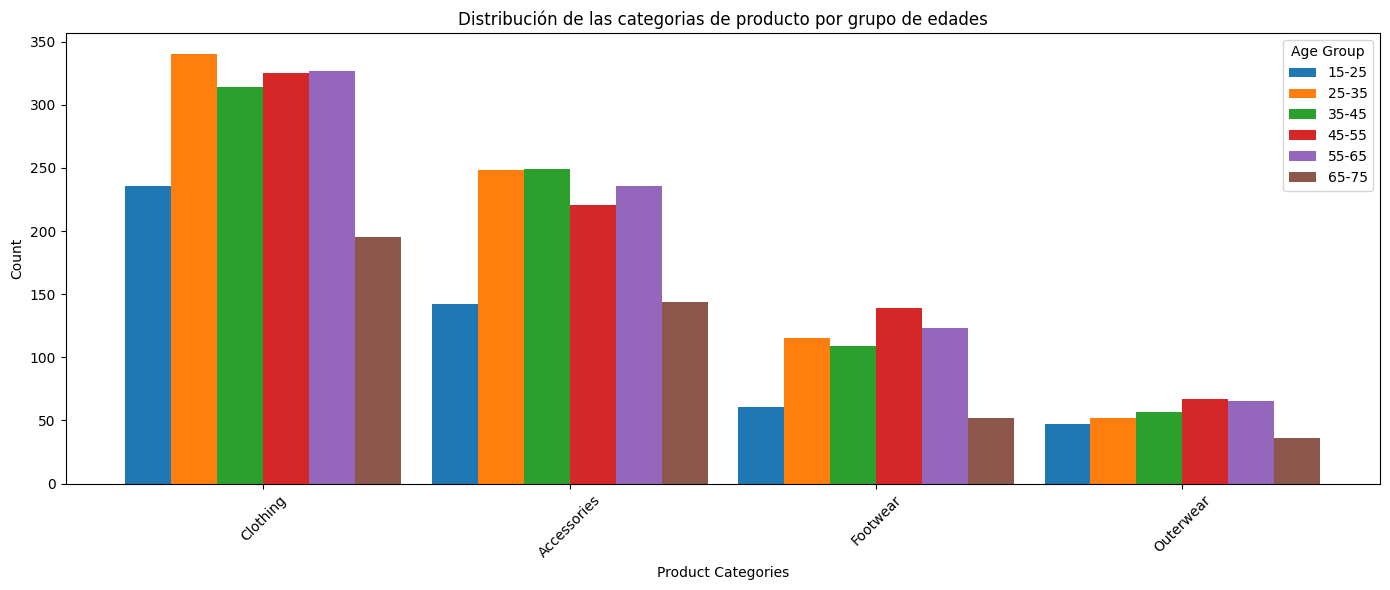

In [34]:
age_groups = [15, 25, 35, 45, 55, 65] #Limites de grupo de edad. Ejemplo : 15-25, 25-35 ...

# Crea subplots por cada grupo de edad
fig, ax = plt.subplots(figsize=(14, 6))

# Inicializar un diccionario para almacenar recuentos de categorías para cada grupo de edad
category_counts_by_age = {age: [] for age in age_groups}

# Calcular la cantidad por cetegoria counts por cada grupo de edad
for age in age_groups:
    age_group_data = df[(df['Age'] >= age) & (df['Age'] < age + 10)]
    category_counts = age_group_data['Category'].value_counts()
    category_counts_by_age[age] = category_counts

# Create the bar chart
width = 0.15
x = np.arange(len(category_counts_by_age[age_groups[0]].index))

for i, age in enumerate(age_groups):
    category_counts = category_counts_by_age[age]
    ax.bar(x + i * width, category_counts, width=width, label=f'{age}-{age+10}')

ax.set_xlabel('Product Categories')
ax.set_ylabel('Count')
ax.set_title('Distribución de las categorias de producto por grupo de edades')
ax.set_xticks(x + width * (len(age_groups) - 1) / 2)
ax.set_xticklabels(category_counts_by_age[age_groups[0]].index, rotation=45)
ax.legend(title='Age Group')

plt.tight_layout()
plt.show()


*   Podemos observar , que la ropa(clothing) es la categoría mas pupular entre todos los grupos de edades al igual que la ropa ropa de abrigo(outerwear), los accesorios (Accessories) son muy populares en todos los grupos de edades excepto en los de 15-25 y 65-75 años. Sin embargo, hemos visto que en la categoría de calzado(Footwear) es más popular en el grupo de edad de 45 a 55 años.

# Conclusion


*   Los clientes realizan más compras durante el invierno(winter) y el invierno(Fall) en comparación con el verano(Summer) y la primavera(Spring).
*   La categoría de ropa(clothing) es la más popular y la ropa de abrigo(outerwear) tiene una cantidad ligeramente menor que las otras categorías.
*Los hombres representan el 67% del total de compras y las mujeres representan el 32% del total.
* Montana tiene la mayor cantidad de clientes de todas las sucursales.
* Paypal , Credi Card y Cash son los metodos de pago mas elegidos
